In [ ]:
import torchvision
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from torchvision import transforms
mnist = torchvision.datasets.MNIST(root='.', download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 97128846.23it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 29380473.88it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 30544660.11it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12042053.58it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
def continue_training():
    network.train()
    for i in range(10):
        correct = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = network(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()

            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)

    correct = 0
    network.eval()
    for data, target in test_loader:
        output = network(data)
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).sum()
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, drop1, drop2):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.dropout1 = nn.Dropout(drop1)  # First dropout layer with specified dropout probability
        self.fc2 = nn.Linear(50, 10)
        self.dropout2 = nn.Dropout(drop2)  # Second dropout layer with specified dropout probability

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)  # Applying dropout after the first fully connected layer
        x = self.fc2(x)
        x = self.dropout2(x)  # Applying dropout after the second fully connected layer
        return F.log_softmax(x, dim=1)  # Make sure to specify the dimension for log_softmax


Iteration 1 Training accuracy: 0.6941999793052673
Iteration 1 Testing accuracy: 0.8550000190734863
Iteration 2 Training accuracy: 0.8776000142097473
Iteration 2 Testing accuracy: 0.9265999794006348
Iteration 3 Training accuracy: 0.9014000296592712
Iteration 3 Testing accuracy: 0.944599986076355
Iteration 4 Training accuracy: 0.9205999970436096
Iteration 4 Testing accuracy: 0.948199987411499
Iteration 5 Training accuracy: 0.9243999719619751
Iteration 5 Testing accuracy: 0.9549999833106995
Iteration 1 Training accuracy: 0.734000027179718
Iteration 1 Testing accuracy: 0.8597999811172485
Iteration 2 Training accuracy: 0.878600001335144
Iteration 2 Testing accuracy: 0.925599992275238
Iteration 3 Training accuracy: 0.902400016784668
Iteration 3 Testing accuracy: 0.9435999989509583
Iteration 4 Training accuracy: 0.9211999773979187
Iteration 4 Testing accuracy: 0.953000009059906
Iteration 5 Training accuracy: 0.9332000017166138
Iteration 5 Testing accuracy: 0.9611999988555908
Iteration 1 Train

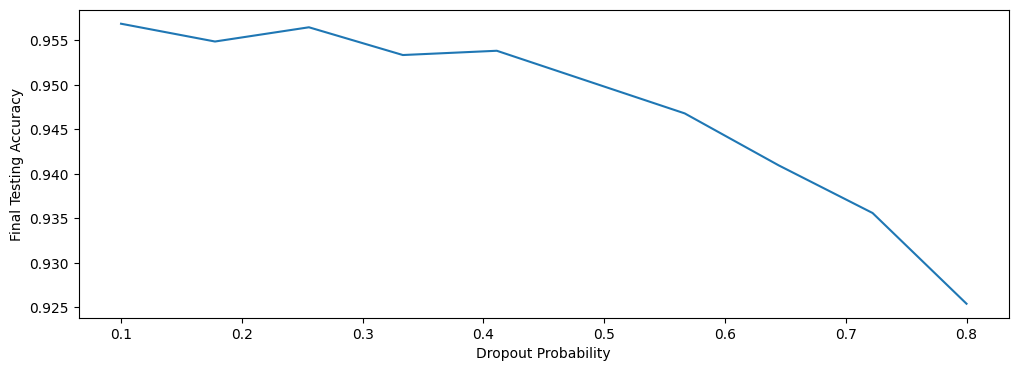

In [ ]:
mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)),
                                        batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)),
                                        batch_size=1000, shuffle=True)



final_testing_accuracy = []
drop_rates = np.linspace(0.1, 0.8, 10)

for r in drop_rates:
    total_accuracy = 0
    for j in range(5):
        network = Net(r, r)
        optimizer = optim.SGD(network.parameters(), lr=0.1, momentum=0.5)
        accuracy_train = []
        accuracy_test = []
        for i in range(5):
            continue_training()

        total_accuracy += accuracy_test[-1]
    final_testing_accuracy.append(total_accuracy / 5)


plt.figure(figsize=(12,4))
plt.plot(drop_rates, final_testing_accuracy)
plt.xlabel('Dropout Probability')
plt.ylabel('Final Testing Accuracy')
plt.show()

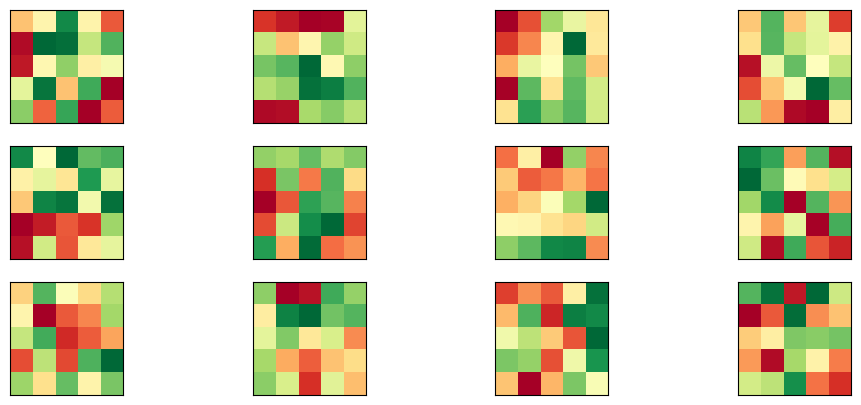

In [ ]:
plt.figure(figsize=(12,5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(network.conv1.weight[i][0].detach().numpy(), cmap='RdYlGn', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()